In [ ]:
!pip install -r requirements.txt

  Using cached contourpy-1.3.1-cp312-cp312-macosx_10_13_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-macosx_10_9_x86_64.whl.metadata (6.3 kB)
  Using cached pillow-11.0.0-cp312-cp312-macosx_10_13_x86_64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 3.8 MB/s eta 0:00:0000:0100:01
Using cached contourpy-1.3.1-cp312-cp312-macosx_10_13_x86_64.whl (271 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 3.8 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.7-cp312-cp312-macosx_10_9_x86_64.whl (65 kB)
Using cached pillow-11.0.0-cp312-cp312-macosx_10_13_x86_64.whl (3.1 MB)
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)


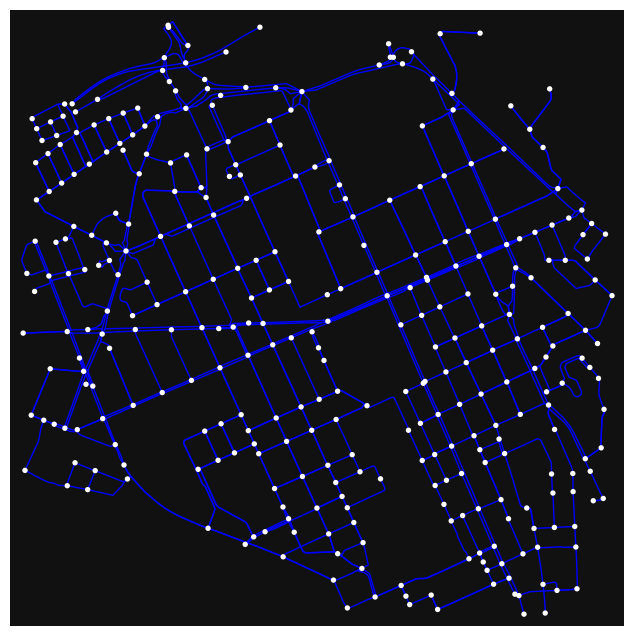

osmid      highway  \
u   v   key                                                                   
0   1   0                                            155195602    secondary   
    198 0                                            178204659  residential   
    297 0                                            135177263  residential   
1   2   0                                            155195602    secondary   
    121 0                                            161366803    secondary   
...                                                        ...          ...   
330 303 0                                [22884865, 836036318]     tertiary   
331 105 0                                            836036321  residential   
    303 0                               [836232515, 836232523]     tertiary   
    64  0    [836036323, 836232516, 1279041464, 1279041465,...  residential   
    154 0                               [836232518, 836036319]  residential   

             maxspeed                        name  oneway reversed  \
u   v   key                                                          
0   1   0          40            Sankt Eriksgatan    True    False   
    198 0          30             Rörstrandsgatan    True    False   
    297 0          40             Sankt Eriksplan    True    False   
1   2   0          40            Sankt Eriksgatan    True    False   
    121 0          40                   Torsgatan    True    False   
...               ...                         ...     ...      ...   
330 303 0    [30, 40]  [Tegnérgatan, Barnhusbron]    True    False   
331 105 0          30                   Dalagatan   False    False   
    303 0          30                 Tegnérgatan    True    False   
    64  0          30                 Tegnérgatan    True    False   
    154 0          30                   Dalagatan    True    False   

                 length   lanes  \
u   v   key                       
0   1   0    176.518189       2   
    198 0     41.249390     NaN   
    297 0     49.013062     NaN   
1   2   0     61.485924       2   
    121 0    137.817305       2   
...                 ...     ...   
330 303 0     41.975015       2   
331 105 0     44.920034     NaN   
    303 0    138.453451     NaN   
    64  0    110.582847  [2, 1]   
    154 0     50.842200     NaN   

                                                      geometry  u_original  \
u   v   key                                                                  
0   1   0    LINESTRING (331461.283 6581610.585, 331466.443...      119701   
    198 0    LINESTRING (331461.283 6581610.585, 331459.145...  1676126876   
    297 0    LINESTRING (331461.283 6581610.585, 331463.419...  1676126874   
1   2   0    LINESTRING (331533.191 6581760.266, 331520.052...  1676126887   
    121 0    LINESTRING (331533.191 6581760.266, 331546.331...  1733438727   
...                                                        ...         ...   
330 303 0    LINESTRING (332075.687 6581214.789, 332098.261...  4311851770   
331 105 0    LINESTRING (332223.405 6581301.943, 332221.345...  7803291979   
    303 0    LINESTRING (332223.405 6581301.943, 332220.32 ...  7805022964   
    64  0    LINESTRING (332223.405 6581301.943, 332228.474...  7805022965   
    154 0    LINESTRING (332223.405 6581301.943, 332222.991...  7805022963   

             v_original access  ref width junction bridge tunnel  
u   v   key                                                       
0   1   0    1676126887    NaN  NaN   NaN      NaN    NaN    NaN  
    198 0    1676126880    NaN  NaN   NaN      NaN    NaN    NaN  
    297 0    1484769042     no  NaN   NaN      NaN    NaN    NaN  
1   2   0    1733438735    NaN  NaN   NaN      NaN    NaN    NaN  
    121 0    1733438714    NaN  NaN   NaN      NaN    NaN    NaN  
...                 ...    ...  ...   ...      ...    ...    ...  
330 303 0    1673493435    NaN  NaN   NaN      NaN    yes    NaN  
331 105 0    7803029781    NaN  NaN   NaN   

In [157]:
from OpenStreetMapAPI import get_roads

point = 59.34318, 18.05141
radius = 1000

roads = get_roads(point, radius, plot = True)
roads

array('d', [331461.2828982394, 331466.44295809406, 331471.3301154747, 331506.3570031539, 331516.8922373084, 331520.0517755038, 331533.1911675028])
array('d', [6581610.585390444, 6581612.777849328, 6581625.182664734, 6581723.855481869, 6581752.846227922, 6581761.12424102, 6581760.266168327])


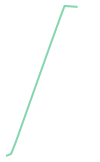

In [156]:
print(roads.iloc[0]['geometry'].coords.xy[0])
print(roads.iloc[0]['geometry'].coords.xy[1])
roads.iloc[0]['geometry']

In [162]:
import osmnx as ox
import geopandas as gpd

# Get the network graph and convert to GeoDataFrames
point = (40.748817, -73.985428)  # Example: Times Square, NY
radius = 500  # Search radius in meters
G = ox.graph_from_point(point, network_type="drive", dist=radius)

# Convert graph to GeoDataFrames
nodes, edges = ox.graph_to_gdfs(G)

# Example: Extract a point along the first edge in `edges`
distance = 10  # Distance along the LineString in meters

# Function to interpolate a point along a LineString
edges['fraction'] = 0.5
edges['point_at_fraction'] = edges.apply(
    lambda row: row['geometry'].interpolate(row['fraction'] * row['length']),
    axis=1
)

# Display the edges with the interpolated point
print(edges[['length', 'point_at_fraction']])
print(nodes)

                               length           point_at_fraction
u          v          key                                        
42427786   42427787   0    170.269094  POINT (-73.98861 40.74605)
           42438544   0     79.130692   POINT (-73.9873 40.74468)
42427787   42427797   0    140.678428  POINT (-73.99007 40.74667)
           42428223   0     85.870365  POINT (-73.98875 40.74529)
42427797   42430288   0     77.844650  POINT (-73.98962 40.74728)
...                               ...                         ...
4597668033 42445409   0     12.048766  POINT (-73.98312 40.74455)
4597668044 42445896   0    148.958637  POINT (-73.98435 40.74586)
           4597668033 0     78.528981   POINT (-73.98324 40.7446)
6223969260 42443680   0    261.306805  POINT (-73.98549 40.74715)
           42428232   0     85.364062  POINT (-73.98833 40.74755)

[133 rows x 2 columns]
                    y          x          highway  street_count  \
osmid                                              

In [164]:
import osmnx as ox
import geopandas as gpd

# Step 1: Get the graph and project it
point = (40.748817, -73.985428)  # Example: Times Square, NY
radius = 500  # Radius in meters
G = ox.graph_from_point(point, network_type="drive", dist=radius)

# Project the graph to UTM for accurate distance calculations
G_proj = ox.project_graph(G)

# Step 2: Consolidate intersections
# Ensure the graph remains consistent after consolidation
G2 = ox.consolidate_intersections(
    G_proj,
    rebuild_graph=True,
    tolerance=15,
    dead_ends=False
)

# Convert the consolidated graph to GeoDataFrames
nodes, edges = ox.graph_to_gdfs(G2)

nodes = nodes.to_crs(epsg=4326)
edges = edges.to_crs(epsg=4326)

# Step 3: Check example coordinates
print(nodes.head())  # Nodes should now have UTM coordinates
print(edges.geometry.head())  # Edges should contain LineStrings with UTM coordinates


      osmid_original             y              x          highway  \
osmid                                                                
0           42427786  4.510977e+06  585535.631867  traffic_signals   
1           42427787  4.511059e+06  585385.739338  traffic_signals   
2           42438544  4.510908e+06  585498.040694  traffic_signals   
3           42427797  4.511126e+06  585261.900493  traffic_signals   
4           42428223  4.510974e+06  585374.638098  traffic_signals   

       street_count  cluster                    geometry  
osmid                                                     
0                 4      NaN   POINT (-73.98685 40.7453)  
1                 4      NaN  POINT (-73.98861 40.74605)  
2                 4      NaN   POINT (-73.9873 40.74468)  
3                 4      NaN  POINT (-73.99007 40.74667)  
4                 4      NaN  POINT (-73.98875 40.74529)  
u  v  key
0  1  0      LINESTRING (-73.98685 40.7453, -73.98697 40.74...
   2  0      LINESTRING